In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# 1.來觀察地區房價走勢

####  建立一個 def 來繪製房價走勢圖

In [14]:
def plot_average_price_trend(data_path, save_path):
    data = pd.read_excel(data_path)
    #先將年與月份合併成另一個有年月份的資料欄位
    data['YearMonth'] = pd.to_datetime(data['YrSold'].astype(str) + '-' +
                                       data['MoSold'].astype(str))

    #以年月份為索引，計算售價平均值
    average_price_bydate = data.groupby('YearMonth')['SalePrice'].mean()

    ## 製作折線圖
    # 設定 Matplotlib樣式
    plt.figure(figsize=(10, 6))  # 設定圖片大小
    plt.rcParams['axes.facecolor'] = 'dimgray'  # 將繪製區域變成灰色背景
    # 繪製折線圖
    plt.plot(
        average_price_bydate.index,  # 指定 X 軸數據，即日期
        average_price_bydate.values,  # 指定 Y 軸數據，即平均售價
        marker='o',  # 指定折線部分的樣式， 'o' 為圓點
        linestyle='-',  # 指定折線的樣式， '-' 為實線
        color='white')  # 指定折線顏色，這裡使用藍色

    plt.title('1-House Price Trends', fontweight='bold', size=20)  # 設定字體大小

    plt.xlabel('Year Month', fontweight='bold', size=13)  # 設定 x 軸字體大小
    plt.ylabel('Average Price', fontweight='bold', size=13)  # 設定 y 軸字體大小

    # rotation=45 表示将刻度标签旋转45度
    plt.xticks(rotation=45)  # 設定 x 軸刻度標籤顏色

    plt.gca().xaxis.set_major_formatter(
        plt.matplotlib.dates.DateFormatter('%Y-%m'))
    ### 語法解釋
    # plt.gca() : 這個函式返回當前的 Axes 物件，即目前正在操作的圖表區域。
    # xaxis : 這是 Axes 物件的 x 軸屬性。
    # set_major_formatter()：這個方法設定主要刻度線的格式化程序（formatter），這裡是用來格式化日期顯示
    # plt.matplotlib.dates.DateFormatter('%Y-%m')：這是一個日期格式化的實例，使用 %Y-%m 作為日期的格式，其中 %Y 代表四位數年份，%m 代表兩位數月份。

    plt.grid(True)  # 在圖表上顯示網格線
    plt.tight_layout()  # 調整圖表的各元素布局，使各元素不會被折疊或截斷

    # 保存圖片，並出輸出成 PNG 文件後，指定保存路徑
    # bbox_inches'tight' 剪裁空白邊緣
    plt.savefig(save_path, bbox_inches='tight', dpi=300)

    plt.show()

#### 從上面得知不同年份的房屋平均價格

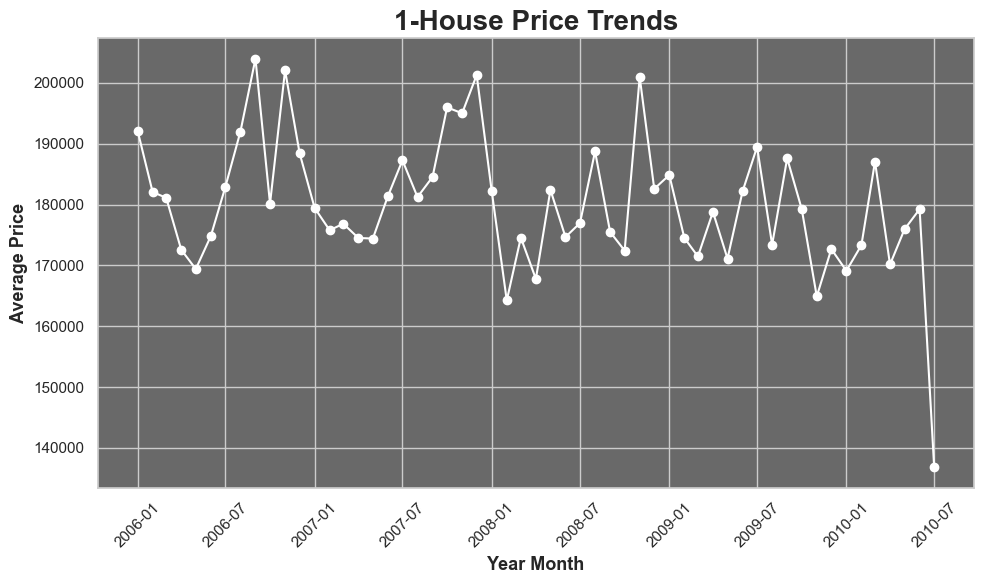

In [15]:
# 讀入Excel資料
data_file_path = r'E:/DataLearn/1.House/All_DataSheet.xlsx'
# 指定圖片處存路徑
save_path_p1 = r'E:\DataLearn\1.House\GraphAnalysis\1-HousePriceTrends.png'
plot_average_price_trend(data_file_path, save_path_p1)

# 2. 觀察不同物件的價格區間

#### 由於 2010 年物件價格都雪崩，因此取2006-2008的物件，來觀察不同物件的價格地帶

In [16]:
# 使用 seaborn 套件繪製
import seaborn as sns

In [17]:
def plot_price_boxplot(data_path, save_path):
    # 讀取數據，並以 YrSold 年分欄位選擇 2006 ~ 2008 的資料
    # .query() 用於對資料進行查詢 和 過濾操作
    data_2006_2008 = pd.read_excel(data_path).query('2006 <= YrSold <= 2008')

    #去除離群值
    # 使用 IQR 方法移除 "SalePrice" 列的离群值
    # quantile() 用來計算分位數
    Q1 = data_2006_2008['SalePrice'].quantile(0.25)  # 計算第1四分位數
    Q3 = data_2006_2008['SalePrice'].quantile(0.75)  # 計算第3四分位數
    IQR = Q3 - Q1  # 是数据的上四分位数与下四分位数之差。IQR 用于确定数据中的离群值的范围。
    lower_bound = Q1 - 1.5 * IQR  # 計算下限
    upper_bound = Q3 + 1.5 * IQR  # 計算上限
    # 篩選資料
    data_2006_2008 = data_2006_2008[
        (data_2006_2008['SalePrice'] >= lower_bound)
        & (data_2006_2008['SalePrice'] <= upper_bound)]

    #設定 Seaborn 樣式
    sns.set(style='whitegrid')

    #繪製圖表區間
    plt.figure(figsize=(10, 6))

    #palette="Set3" 表示使用 Seaborn 中的 "Set3" 调色板，有多色調色板
    sns.boxplot(x='OverallCond',
                y='SalePrice',
                data=data_2006_2008,
                palette='Set3')

    #設定圖標標籤
    # fontweight = 'bold' 字體粗體
    plt.title('2 - 2006-2008 House Class Price Range',
              fontweight='bold',
              size=20)
    plt.xlabel('House Level', fontweight='bold', size=13)
    plt.ylabel('Sale Price', fontweight='bold', size=13)

    plt.tight_layout()

    #輸出圖片
    plt.savefig(save_path, bbox_inches='tight', dpi=300)

    plt.show()

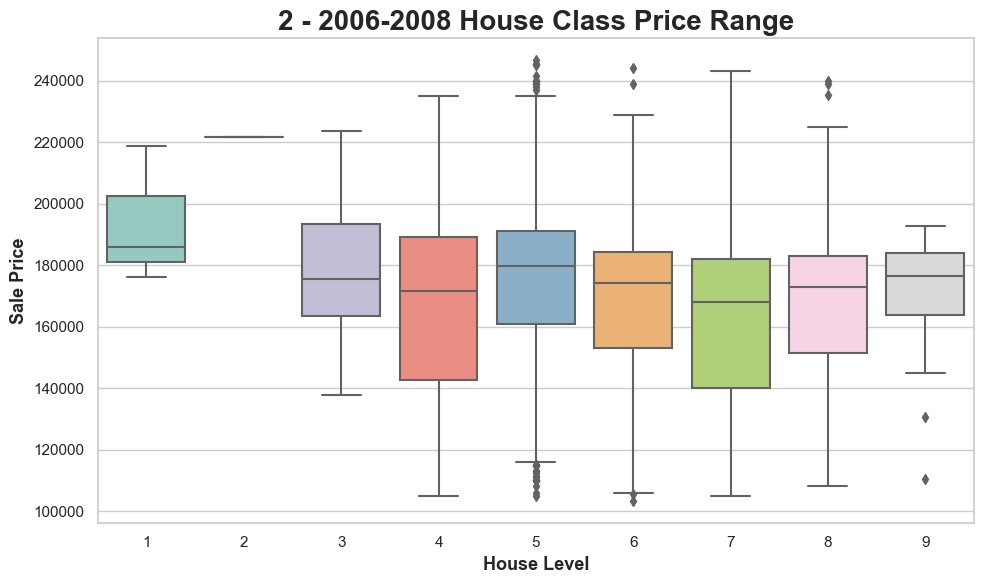

In [18]:
# 讀入Excel資料
data_file_path = r'E:/DataLearn/1.House/All_DataSheet.xlsx'
# 指定圖片處存路徑
save_path_P2 = r'E:\DataLearn\1.House\GraphAnalysis\2-HouseClassPriceRange.png'
plot_price_boxplot(data_file_path, save_path_P2)

In [19]:
data = pd.read_excel(data_file_path)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,6,2006,WD,Normal,167081
2915,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,4,2006,WD,Abnorml,164789
2916,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,9,2006,WD,Abnorml,219222
2917,2918,85,RL,62.0,10441,Pave,None,Reg,Lvl,Inside,...,0,None,MnPrv,Shed,700,7,2006,WD,Normal,184924


In [20]:
Neighborhood_count = data['Neighborhood'].value_counts()
print(Neighborhood_count)

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64


# 3. 觀察不同區域的房屋物件價格

In [21]:
def plot_average_price_by_region(data_path, save_path):
    # 輸入資料與篩選
    data_2006_2008 = pd.read_excel(data_path).query('2006 <= YrSold <= 2008')
    average_price_by_region = data_2006_2008.groupby(
        'Neighborhood')['SalePrice'].mean()

    # 繪製圖片
    plt.figure(figsize=(30, 6))
    plt.bar(average_price_by_region.index,
            average_price_by_region.values,
            color='skyblue')

    # 设置图表标题和标签
    plt.title('3 - Regional Average House Price Comparison',
              fontweight='bold',
              size=20)
    plt.xlabel('Region', fontweight='bold', size=13)
    plt.ylabel('Average Price', fontweight='bold', size=13)

    plt.tight_layout()

    # 保存图像
    plt.savefig(save_path, bbox_inches='tight', dpi=300)

    plt.show()

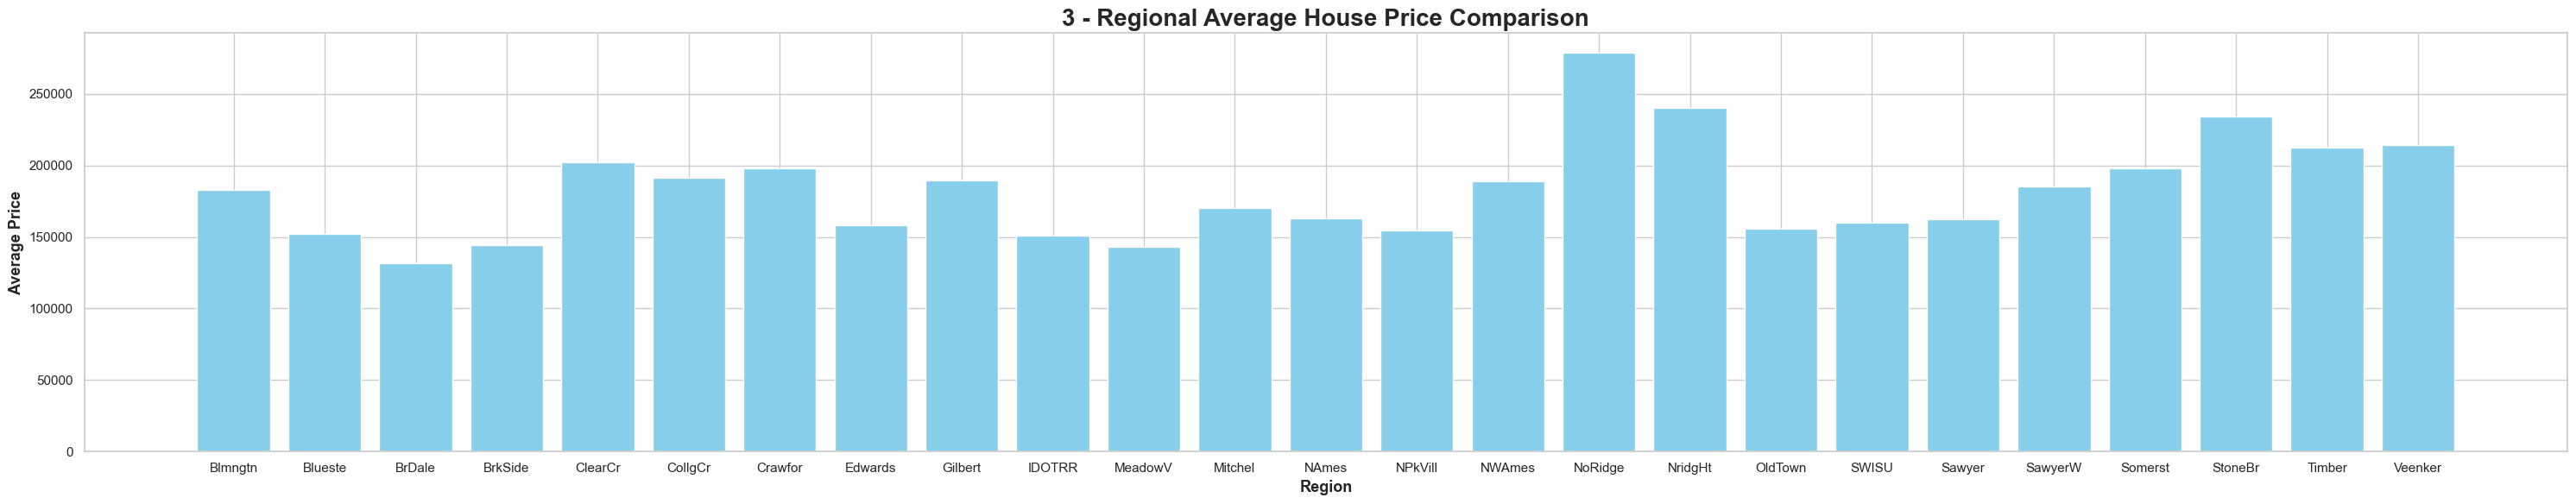

In [22]:
# 讀入Excel資料
data_file_path = r'E:/DataLearn/1.House/All_DataSheet.xlsx'
# 指定圖片處存路徑
save_path_P3 = r'E:\DataLearn\1.House\GraphAnalysis\3-RegionalAverageHousePriceComparison.png'
plot_average_price_by_region(data_file_path, save_path_P3)

# 4. 分析物件地坪與物件售價的關聯性

In [38]:
#建立一個分析與繪製地坪與物件售價的點散圖
def Floor_Price_plot_scatter(data_path, save_path):
    data_2006_2008 = pd.read_excel(data_path).query('2006 <= YrSold <= 2008')

    # 提取地坪面積與銷售價格
    data_2006_2008['Total_area'] = data_2006_2008['LotArea'] + data_2006_2008[
        '1stFlrSF'] + data_2006_2008['2ndFlrSF']
    area = data_2006_2008['Total_area']

    # 繪製點散圖
    plt.figure(figsize=(15, 10))
    plt.scatter(data_2006_2008['Total_area'],
                data_2006_2008['SalePrice'],
                alpha=0.5, 
                c='red')
    # 設置 x 軸和 y 軸的數字樣式
    plt.xticks(fontsize=15)  # 設置 x 軸數字樣式
    plt.yticks(fontsize=15)  # 設置 y 軸數字樣式
    
    plt.title('4 - Total Area and Sale Price',
              fontweight='bold',
              size=25)
    plt.xlabel('House Total Area', fontweight='bold', size=17)
    plt.ylabel('Sale Price', fontweight='bold', size=17)

    plt.tight_layout()

    # 保存图像
    plt.savefig(save_path, bbox_inches='tight', dpi=300)

    plt.show()

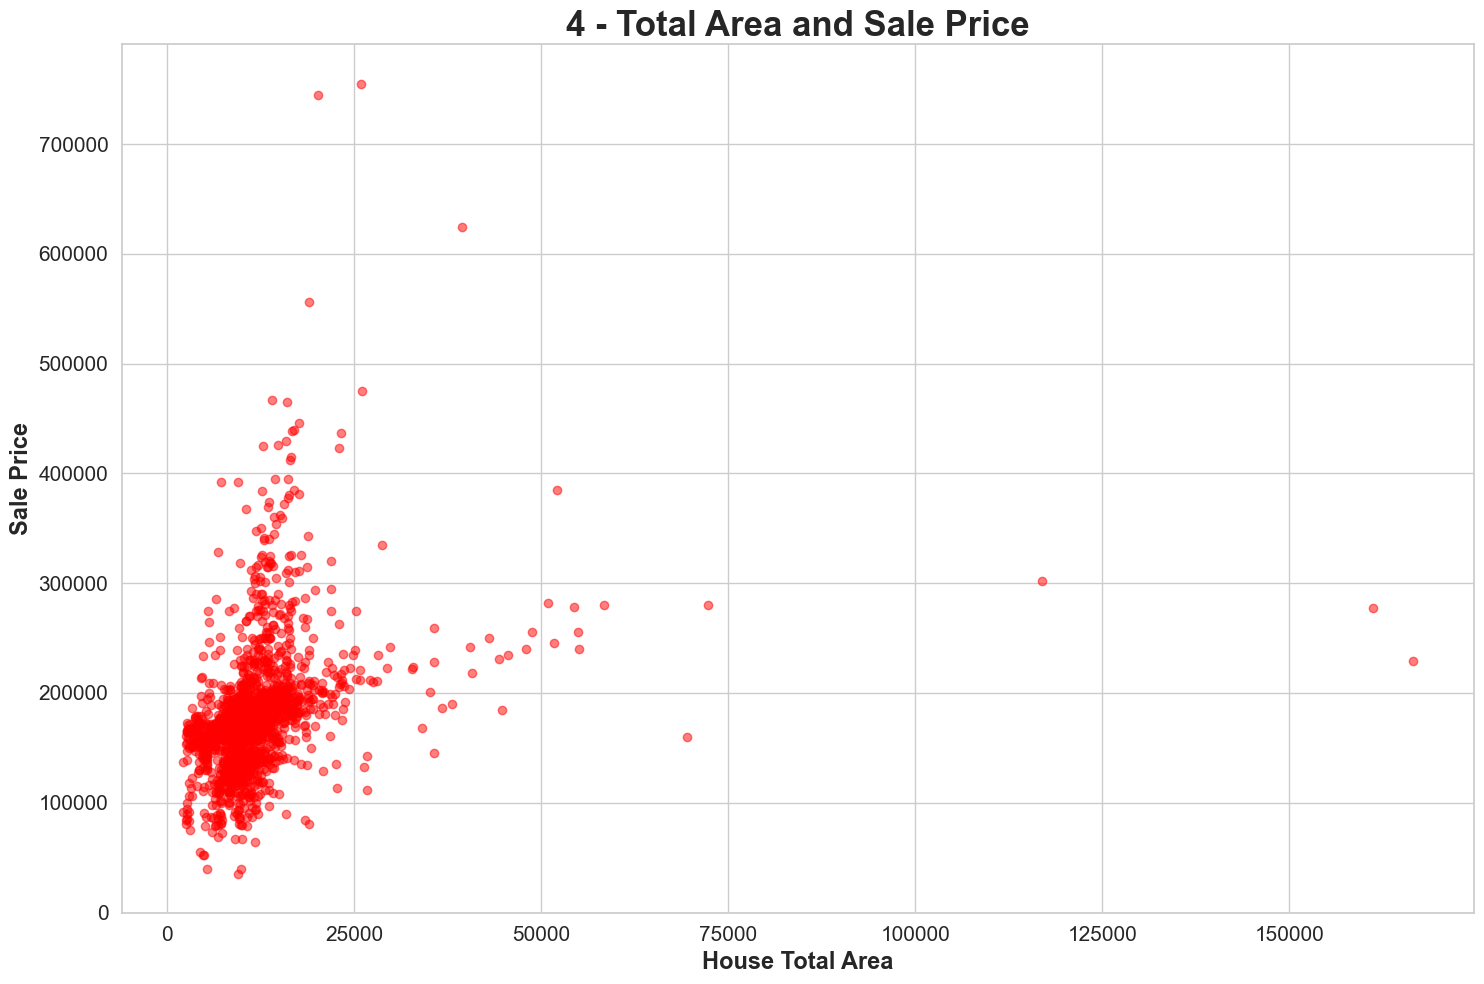

In [39]:
# 讀入Excel資料
data_file_path = r'E:/DataLearn/1.House/All_DataSheet.xlsx'
# 指定圖片處存路徑
save_path_P4 = r'E:\DataLearn\1.House\GraphAnalysis\4-TotalAreaOfThePropertyAndTheSellingPrice.png'
Floor_Price_plot_scatter(data_file_path, save_path_P4)